In [13]:
%matplotlib inline
# Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [14]:
# Read the City and Ride Data
city_data = pd.read_csv("Raw_Data/city_data.csv")
ride_data = pd.read_csv("Raw_Data/ride_data.csv")

In [15]:
# Drop any duplicate values
city_data = city_data.drop_duplicates('city')
# Check city data
city_data.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [16]:
# Display the data table for preview
ride_data.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,1/14/18 10:14,13.83,5.739410e+12
1,South Michelleport,3/4/18 18:24,30.24,2.343910e+12
2,Port Samanthamouth,2/24/18 4:29,33.44,2.005070e+12
3,Rodneyfort,2/10/18 23:22,23.44,5.149250e+12
4,South Jack,3/6/18 4:28,34.58,3.908450e+12


In [17]:
# Combine the data into a single dataset
pyber_data = city_data.merge(ride_data, on = 'city', how = 'outer')
pyber_data.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2/24/18 8:40,13.93,5.628550e+12
1,Richardfort,38,Urban,2/13/18 12:46,14.00,9.100500e+11
2,Richardfort,38,Urban,2/16/18 13:52,17.92,8.206390e+11
3,Richardfort,38,Urban,2/1/18 20:18,10.26,9.554940e+12
4,Richardfort,38,Urban,4/17/18 2:26,23.00,7.200210e+11


## Bubble Plot of Ride Sharing Data

In [18]:
# Obtain the x and y coordinates for each of the three city types
# Incorporate the other graph properties
# Create a legend
# Incorporate a text label regarding circle size

urban_city = pyber_data.loc[(pyber_data["type"] == "Urban")]
suburban_city = pyber_data.loc[(pyber_data["type"] == "Suburban")]
rural_city = pyber_data.loc[(pyber_data["type"] == "Rural")]

In [19]:
avg_fare_urban_city = urban_city.groupby(['city'])['fare'].mean()
total_rides_urban_city = urban_city.groupby(['city']).count()['ride_id']
total_drivers_urban_city = urban_city.groupby(['city'])['driver_count'].value_counts()

avg_fare_suburban_city = suburban_city.groupby(['city'])['fare'].mean()
total_rides_suburban_city = suburban_city.groupby(['city']).count()['ride_id']
total_drivers_suburban_city = suburban_city.groupby(['city'])['driver_count'].value_counts()

avg_fare_rural_city = rural_city.groupby(['city'])['fare'].mean()
total_rides_rural_city = rural_city.groupby(['city']).count()['ride_id']
total_drivers_rural_city = rural_city.groupby(['city'])['driver_count'].value_counts()

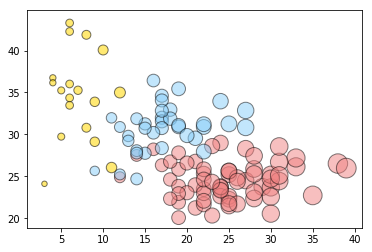

In [20]:
# Build the scatter plots for each city types
plt.scatter(total_rides_urban_city, avg_fare_urban_city,s=total_drivers_urban_city*10,
            marker ='o', facecolors ="lightcoral", edgecolors='black',alpha = 0.5, label="Urban")

plt.scatter(total_rides_suburban_city, avg_fare_suburban_city,s=total_drivers_suburban_city*10,
            marker ='o', facecolors ="lightskyblue", edgecolors='black',alpha = 0.5, label="Suburban")

plt.scatter(total_rides_rural_city, avg_fare_rural_city,s=total_drivers_rural_city*10,
            marker ='o', facecolors ="gold", edgecolors='black',alpha = 0.55, label="Rural")

In [21]:
# Save an image of the chart and print to screen
plt.savefig("Images/Pyber Ride Sharing.png")
plt.show()

<Figure size 432x288 with 0 Axes>

## Total Fares by City Type

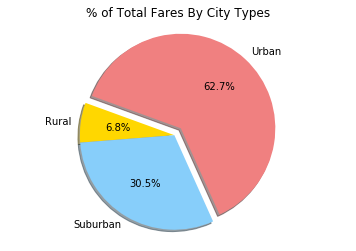

In [22]:
# Calculate Type Percents
# Build Pie Chart
# Save Figure

total_fare = pyber_data.groupby(['type'])['fare'].sum()

labels = ["Rural","Suburban","Urban" ]

colors = ["gold","lightskyblue","lightcoral"]
explode = (0, 0, 0.1)
plt.title("% of Total Fares By City Types")
plt.pie(total_fare, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%",shadow=True, startangle=160)
plt.axis("equal")
plt.savefig("Images/% of Total Fares By City Types.png")
plt.show()

## Total Rides by City Type

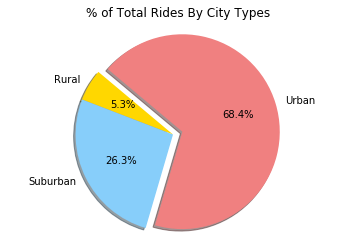

In [23]:
# Calculate Ride Percents
# Build Pie Chart
# Save Figure

total_rides = pyber_data.groupby(['type'])['ride_id'].count()

labels = ["Rural","Suburban","Urban" ]

colors = ["gold","lightskyblue","lightcoral"]
explode = (0, 0, 0.1)
plt.title("% of Total Rides By City Types")
plt.pie(total_rides, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.savefig("Images/% of Total Rides By City Types.png")
plt.show()

## Total Drivers by City Type

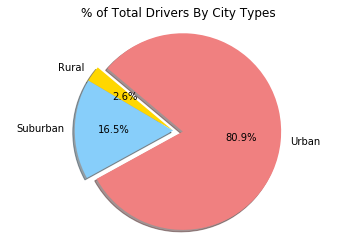

In [24]:
# Calculate Driver Percents

# Build Pie Charts

# Save Figure

total_drivers = city_data.groupby(['type'])['driver_count'].sum()

labels = ["Rural","Suburban","Urban" ]

colors = ["gold","lightskyblue","lightcoral"]
explode = (0, 0, 0.1)
plt.title("% of Total Drivers By City Types")
plt.pie(total_drivers, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.savefig("Images/% of Total Drivers By City Types.png")
plt.show()

In [25]:
# all three pie charts show that urban areas have great percentage fares, total drivers, and total rides.


In [ ]:
# From the data collected it can be said that it would be wise to invest and expand in the rural areas.



In [ ]:
# From the data collected it can be said that rural areas are a lot less busy than suburban areas
